In [8]:
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
import warnings

# Fix: Provide the required 'action' argument to filterwarnings
warnings.filterwarnings("ignore")  # This will ignore all warnings

# Define the device (CPU or GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define a simple model for demonstration purposes
# This is a basic CNN that would work with MNIST-sized images (28x28)
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

# Initialize the model and move it to the device
model = SimpleModel().to(device)
# Note: In a real scenario, you might want to load pre-trained weights:
# model.load_state_dict(torch.load('your_model_weights.pth'))

target_digit = 3

# start from random noise
fake_img = torch.randn(1, 1, 28, 28, device=device, requires_grad=True)

attack_optimizer = optim.Adam([fake_img], lr=0.1)

for step in range(800):
    attack_optimizer.zero_grad()

    logits = model(fake_img)
    loss = -logits[0, target_digit]  # maximize target class

    loss.backward()
    attack_optimizer.step()

    # keep pixels in valid range
    fake_img.data.clamp_(0, 1)

    if step % 100 == 0:
        prob = F.softmax(logits, dim=1)[0, target_digit].item()
        print(f"Step {step} | Confidence: {prob:.4f}")

[W224 00:20:24.960383809 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:24.971521530 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:24.973383827 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:24.983055762 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:24.984247244 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:24.993711416 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:24.994903649 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:24.003189280 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:24.004371133 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:25.012584910 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:2

Step 0 | Confidence: 0.0812


[W224 00:20:25.167255309 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:25.168585763 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:25.179430055 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:25.180572694 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:25.191223864 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:25.192395624 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:25.203779045 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:25.204957555 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:25.214073274 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:25.215212861 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:2

Step 100 | Confidence: 0.1193


[W224 00:20:26.198820293 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:26.200140717 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:26.208433784 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:26.209411169 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:26.217638649 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:26.218783502 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:26.226933047 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:26.227853394 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:26.236065118 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:26.237412843 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:2

Step 200 | Confidence: 0.1044


[W224 00:20:27.244642768 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:27.246039512 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:27.255671791 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:27.256960128 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:27.264039024 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:27.265014825 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:27.273347964 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:27.274476883 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:27.282712374 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:27.283960822 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:2

Step 300 | Confidence: 0.1174


[W224 00:20:28.069914268 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:28.071211821 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:28.080299650 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:28.081574215 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:28.090470413 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:28.091627412 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:28.102329011 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:28.103556853 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:28.113607741 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:28.114823757 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:2

Step 400 | Confidence: 0.1148


[W224 00:20:29.100116427 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.101315805 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.109550331 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.110586094 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.118968643 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.120189491 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.128423298 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.129624881 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.145162574 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.146316100 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:2

Step 500 | Confidence: 0.1089


[W224 00:20:29.929331504 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.930507084 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.938849314 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.940137134 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.950258915 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.951668785 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.962427767 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.963725960 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.973608092 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:29.976284469 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:2

Step 600 | Confidence: 0.1310


[W224 00:20:30.761027294 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:30.762159848 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:30.770133727 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:30.771291106 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:30.779505114 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:30.780641907 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:30.789166230 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:30.790249377 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:30.798749989 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:30.799985665 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:2

Step 700 | Confidence: 0.1285


[W224 00:20:31.585402382 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:31.586522297 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:31.594573074 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:31.595719333 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:31.603800641 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:31.604968928 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:31.612990413 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:31.614130486 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:31.622429597 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:20:31.623571320 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W224 00:2

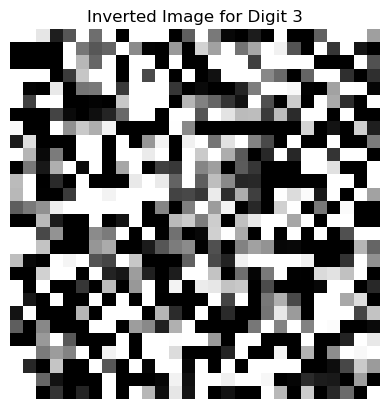

In [9]:
import matplotlib.pyplot as plt

plt.imshow(fake_img.detach().cpu().squeeze(), cmap="gray")
plt.title(f"Inverted Image for Digit {target_digit}")
plt.axis("off")
plt.show()